<a href="https://colab.research.google.com/github/Alexxakiode/Deep-Learning-Project-CartPole-Balancing-within-200-Steps-in-20-Episodes/blob/main/CartPole_balancing_BoltzmannQPolicy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartPole Balancing within 200 Steps in 20 Episodes using BoltzmannQPolicy

In [1]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 2.7 MB/s eta 0:00:00


In [2]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.0 MB/s eta 0:00:00


In [4]:
! pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install randint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement randint (from versions: none)
ERROR: No matching distribution found for randint


In [5]:
# load the gym module
import gym

# Load other basic modules
import matplotlib.pyplot as plt

# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam

import randint

import pickle

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannQPolicy, LinearAnnealedPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent



In [7]:
# EpsGreedyQPolicy
# setup experience replay buffer
# here the sequential memory limit is set up the same as the nb_steps (number of steps)
# parameter in the fit method.  This means that all the action-states will fit into the
# memory buffer
# keep window_length as 1. It's used in other RL methods, but keep it to 1 in DQNs
memory = SequentialMemory(limit=10000, window_length=1)

# define the policy (how we select the actions)
policy_inner = BoltzmannQPolicy()

In [8]:
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 50000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    16/50000: episode: 1, duration: 1.130s, episode steps:  16, steps per second:  14, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 110.841405, mae: 80.797768, mean_q: 169.847717, mean_tau: 0.099974
    32/50000: episode: 2, duration: 0.203s, episode steps:  16, steps per second:  79, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 112.774213, mae: 81.135821, mean_q: 169.419436, mean_tau: 0.099953
    44/50000: episode: 3, duration: 0.156s, episode steps:  12, steps per second:  77, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 119.070819, mae: 79.883658, mean_q: 168.307246, mean_tau: 0.099926
    64/50000: episode: 4, duration: 0.248s, episode steps:  20, steps per second:  81, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 91.309505, mae: 82.917023, mean_q: 

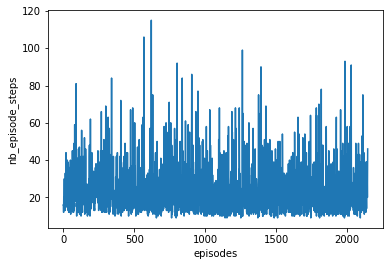

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 183.000, steps: 183
Episode 3: reward: 151.000, steps: 151
Episode 4: reward: 195.000, steps: 195
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 175.000, steps: 175
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 188.000, steps: 188
Episode 16: reward: 173.000, steps: 173
Episode 17: reward: 163.000, steps: 163
Episode 18: reward: 181.000, steps: 181
Episode 19: reward: 153.000, steps: 153
Episode 20: reward: 191.000, steps: 191


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


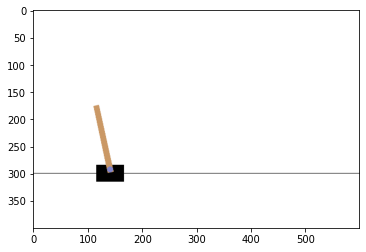

In [15]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='tau',            
                               value_max=0.1,
                               value_min=0.001, 
                               value_test=.05,
                               nb_steps=50000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 50000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   178/50000: episode: 1, duration: 2.933s, episode steps: 178, steps per second:  61, episode reward: 178.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.528 [0.000, 1.000],  loss: 5.348449, mae: 35.520777, mean_q: 71.735194, mean_tau: 0.998122
   374/50000: episode: 2, duration: 3.340s, episode steps: 196, steps per second:  59, episode reward: 196.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.520 [0.000, 1.000],  loss: 3.809555, mae: 35.879948, mean_q: 72.462145, mean_tau: 0.994496
   537/50000: episode: 3, duration: 1.312s, episode steps: 163, steps per second: 124, episode reward: 163.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.528 [0.000, 1.000],  loss: 5.938013, mae: 35.728814, mean_q: 72.218768, mean_tau: 0.990909
   692/50000: episode: 4, duration: 1.181s, episode steps: 155, steps per second: 131, episode reward: 155.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.529 [0.000, 1.000],  loss: 7.205044, mae: 36.230269, mean_q: 72.889

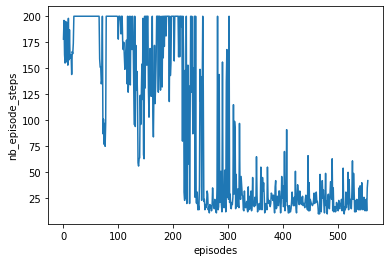

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


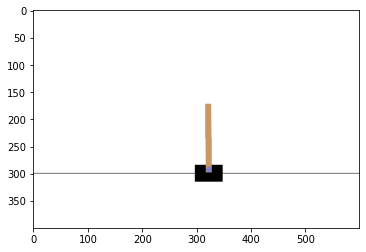

In [14]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='tau',            
                               value_max=1.0,
                               value_min=0.001, 
                               value_test=.05,
                               nb_steps=50000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  129/10000: episode: 1, duration: 1.627s, episode steps: 129, steps per second:  79, episode reward: 129.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.550 [0.000, 1.000],  loss: 5.076256, mae: 30.031866, mean_q: 60.792605, mean_tau: 0.993745
  271/10000: episode: 2, duration: 1.411s, episode steps: 142, steps per second: 101, episode reward: 142.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.521 [0.000, 1.000],  loss: 5.797374, mae: 30.207560, mean_q: 61.055602, mean_tau: 0.982045
  453/10000: episode: 3, duration: 1.854s, episode steps: 182, steps per second:  98, episode reward: 182.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.527 [0.000, 1.000],  loss: 7.056298, mae: 30.472780, mean_q: 61.289083, mean_tau: 0.967465
  589/10000: episode: 4, duration: 0.957s, episode steps: 136, steps per second: 142, episode reward: 136.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.537 [0.000, 1.000],  loss: 4.369361, mae: 30.699295, mean_q: 62.073603,

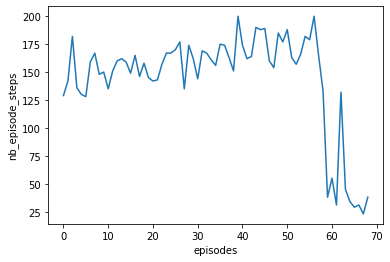

Testing for 20 episodes ...
Episode 1: reward: 168.000, steps: 168
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 164.000, steps: 164
Episode 4: reward: 182.000, steps: 182
Episode 5: reward: 161.000, steps: 161
Episode 6: reward: 180.000, steps: 180
Episode 7: reward: 172.000, steps: 172
Episode 8: reward: 166.000, steps: 166
Episode 9: reward: 171.000, steps: 171
Episode 10: reward: 171.000, steps: 171
Episode 11: reward: 168.000, steps: 168
Episode 12: reward: 178.000, steps: 178
Episode 13: reward: 169.000, steps: 169
Episode 14: reward: 166.000, steps: 166
Episode 15: reward: 168.000, steps: 168
Episode 16: reward: 159.000, steps: 159
Episode 17: reward: 177.000, steps: 177
Episode 18: reward: 156.000, steps: 156
Episode 19: reward: 172.000, steps: 172
Episode 20: reward: 175.000, steps: 175


In [12]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='tau',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


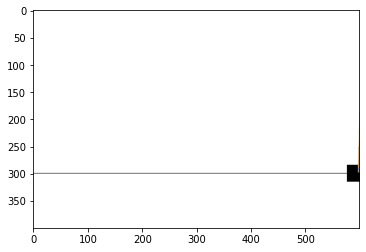

In [13]:
plt.imshow(env.render(mode='rgb_array'))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38:

   17/10000: episode: 1, duration: 0.827s, episode steps:  17, steps per second:  21, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.235 [0.000, 1.000],  loss: 0.371548, mae: 0.517421, mean_q: 0.053184, mean_tau: 0.998664
   33/10000: episode: 2, duration: 0.125s, episode steps:  16, steps per second: 128, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 0.108541, mae: 0.405230, mean_q: 0.614360, mean_tau: 0.997575
   82/10000: episode: 3, duration: 0.330s, episode steps:  49, steps per second: 148, episode reward: 49.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.510 [0.000, 1.000],  loss: 0.011081, mae: 0.609301, mean_q: 1.242141, mean_tau: 0.994357
  135/10000: episode: 4, duration: 0.358s, episode steps:  53, steps per second: 148, episode reward: 53.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.547 [0.000, 1.000],  loss: 0.007794, mae: 0.825500, mean_q: 1.676276, mean_tau: 0

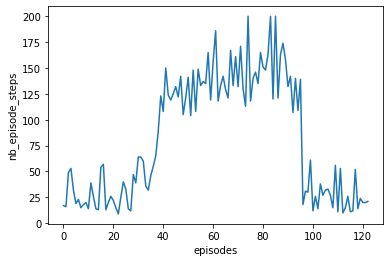

Testing for 20 episodes ...
Episode 1: reward: 137.000, steps: 137
Episode 2: reward: 146.000, steps: 146
Episode 3: reward: 145.000, steps: 145
Episode 4: reward: 132.000, steps: 132
Episode 5: reward: 142.000, steps: 142
Episode 6: reward: 138.000, steps: 138
Episode 7: reward: 177.000, steps: 177
Episode 8: reward: 142.000, steps: 142
Episode 9: reward: 124.000, steps: 124
Episode 10: reward: 133.000, steps: 133
Episode 11: reward: 138.000, steps: 138
Episode 12: reward: 131.000, steps: 131
Episode 13: reward: 128.000, steps: 128
Episode 14: reward: 140.000, steps: 140
Episode 15: reward: 139.000, steps: 139
Episode 16: reward: 159.000, steps: 159
Episode 17: reward: 148.000, steps: 148
Episode 18: reward: 119.000, steps: 119
Episode 19: reward: 137.000, steps: 137
Episode 20: reward: 126.000, steps: 126


In [9]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='tau',            
                               value_max=1.0,
                               value_min=0.01, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


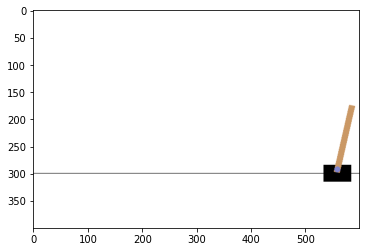

In [11]:
plt.imshow(env.render(mode='rgb_array'))